In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
trdata = pd.read_csv('kaggle_diabetes.csv')

In [3]:
trdata.head(2)
#trdata.tail(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0


In [4]:
trdata.shape

(2000, 9)

In [5]:
trdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
#1 trdata.apply(lambda x: len(x.unique())).sort_values()

#2 def myfunc(x):
    #return len(x.unique())
#trdata.apply(myfunc)

#3 trdata.apply(lambda x: len(x.unique())).sort_values()

trdata.nunique().sort_values()

Outcome                       2
Pregnancies                  17
BloodPressure                47
Age                          52
SkinThickness                53
Glucose                     136
Insulin                     182
BMI                         247
DiabetesPedigreeFunction    505
dtype: int64

In [7]:
trdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [8]:
#trdata.apply(lambda x : sum(x.isnull()))
trdata.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
def complete_data(trdata):
    return pd.DataFrame({"Data Type":trdata.dtypes,"No of Unique Data":trdata.apply(lambda x: x.nunique(),axis=0),
                       "Levels":trdata.apply(lambda x: str(x.unique()),axis = 0),"Null_values":trdata.isnull().sum(),'null%':(trdata.isnull().sum()/100)})
complete_data(trdata)

,Data Type,No of Unique Data,Levels,Null_values,null%
Pregnancies,int64,17,[ 2. 0. 1. 4. 8. 3. 6. 5. 7. 10. 12. ...,0,0.0
Glucose,int64,136,[138. 84. 145. 135. 139. 173. 99. 194. 83. ...,0,0.0
BloodPressure,int64,47,[ 62. 82. 0. 68. 78. 72. 80. 65. 90. ...,0,0.0
SkinThickness,int64,53,[ 35. 31. 0. 42. 41. 32. 17. 28. 30. ...,0,0.0
Insulin,int64,182,[ 0. 125. 250. 480. 265. 66. 122. 76. 145. ...,0,0.0
BMI,float64,247,[33.6 38.2 44.2 42.3 40.7 46.5 25.6 26.1 36.8 ...,0,0.0
DiabetesPedigreeFunction,float64,505,[0.127 0.233 0.63 0.365 0.536 1.159 0.294 0.5...,0,0.0
Age,int64,52,[47. 23. 31. 24. 21. 58. 28. 67. 42. 33. 45. 2...,0,0.0
Outcome,int64,2,[1. 0.],0,0.0


In [10]:
print('Infants:',trdata[trdata['Age'] < 5]['Age'].count())
print('Children:',trdata[trdata['Age'] < 11]['Age'].count())
print('Teens:',trdata[trdata['Age'] < 17]['Age'].count())
print('Adult:',trdata[trdata['Age'] <90]['Age'].count())
print('Adult:',trdata[trdata['Age'] > 90]['Age'].count())
print('Adult:',trdata[trdata['Age'] > 100]['Age'].count())

#print('Adult40-50:',trdata[trdata['Age'] < 30]['Age'].count())

Infants: 0
Children: 0
Teens: 0
Adult: 2000
Adult: 0
Adult: 0


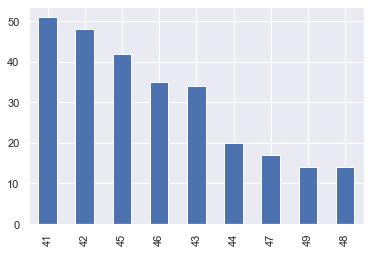

In [48]:
import matplotlib.pyplot as plt
trdata[(trdata['Age'] > 40)& (trdata['Age'] < 50)]['Age'].value_counts().plot(kind='bar')

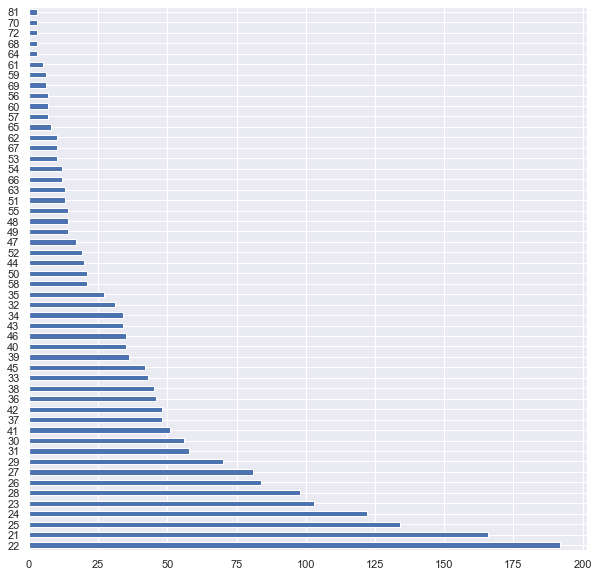

In [52]:
plt.figure(figsize= (10,10))
trdata.Age.value_counts().plot(kind='barh')

In [12]:
trdata.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
#trdata["BMI", "DiabetesPedigreeFunction"] = trdata.["BMI", "DiabetesPedigreeFunction"]astype("int64")
trdata['BMI'] = trdata.BMI.astype("int64")
trdata['DiabetesPedigreeFunction'] = trdata.DiabetesPedigreeFunction.astype("int64")

In [14]:
trdata.dtypes

Pregnancies                 int64
Glucose                     int64
BloodPressure               int64
SkinThickness               int64
Insulin                     int64
BMI                         int64
DiabetesPedigreeFunction    int64
Age                         int64
Outcome                     int64
dtype: object

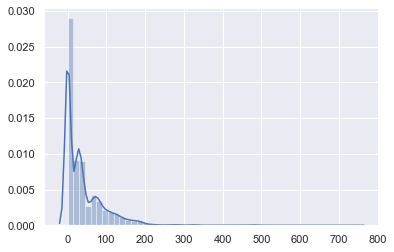

In [15]:
sns.distplot(trdata)
plt.show()

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

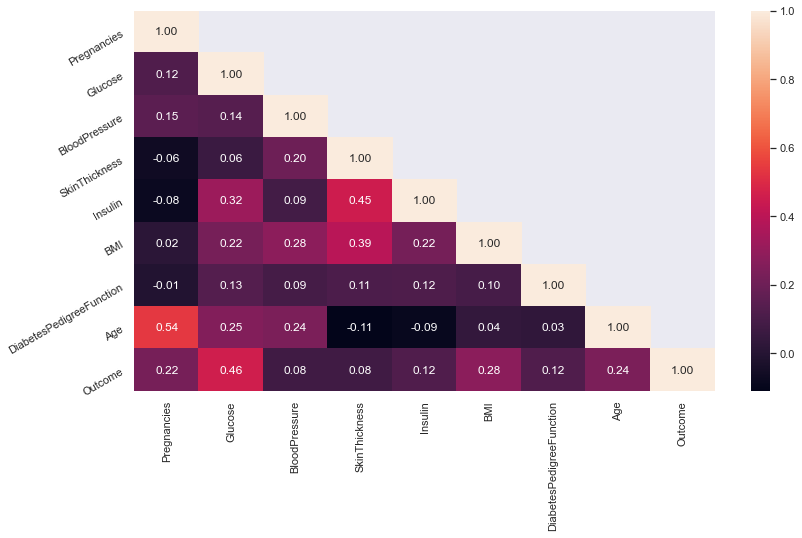

In [16]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = trdata.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Pregnancies    AxesSubplot(0.125,0.536818;0.0945122x0.343182)
dtype: object

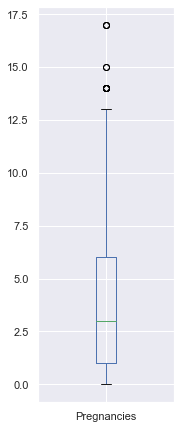

In [17]:
trdata['Pregnancies'].plot(kind='box',layout=(2,7),subplots=1,figsize=(20,16))

Pregnancies                    AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Glucose                     AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
BloodPressure               AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
SkinThickness               AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Insulin                     AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
BMI                         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
DiabetesPedigreeFunction    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Age                               AxesSubplot(0.125,0.125;0.0945122x0.343182)
Outcome                        AxesSubplot(0.238415,0.125;0.0945122x0.343182)
dtype: object

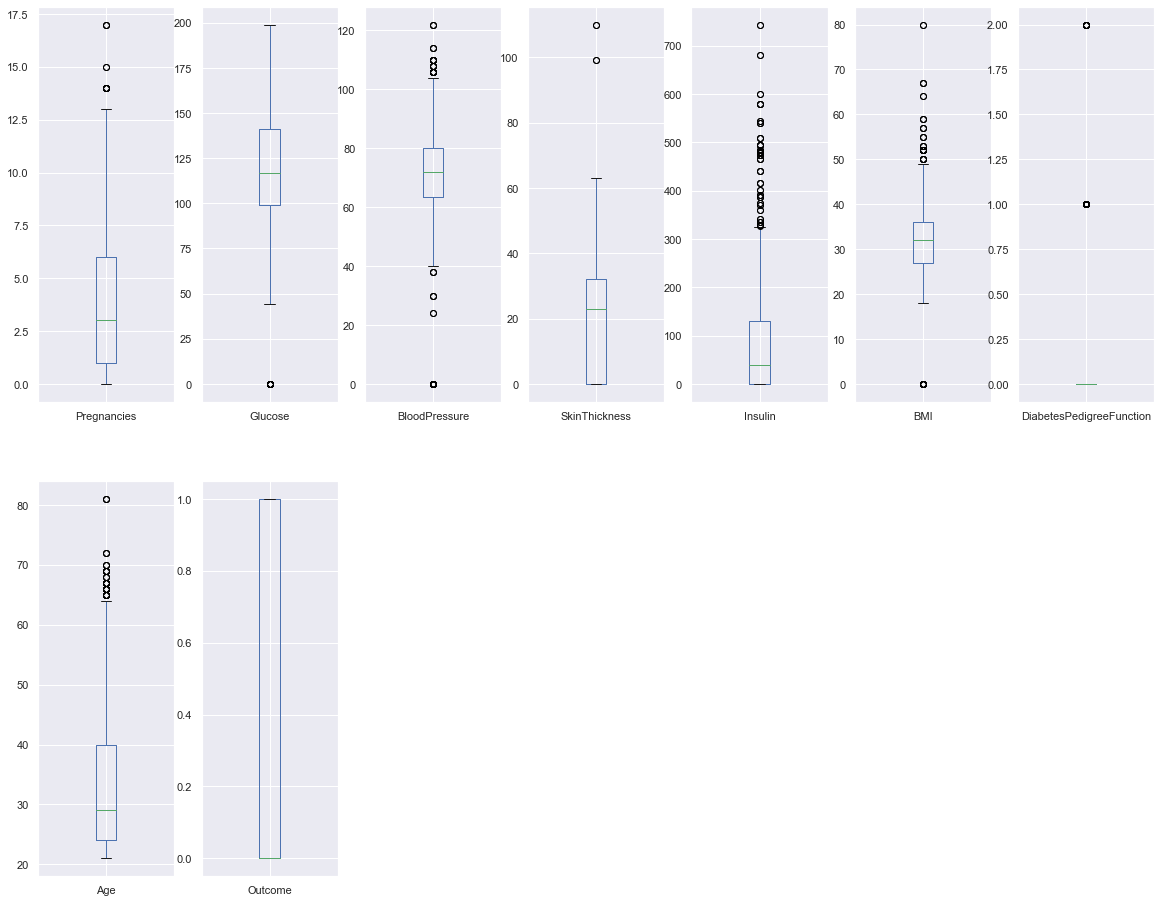

In [18]:
trdata.plot(kind='box',layout=(2,7),subplots=1,figsize=(20,16))

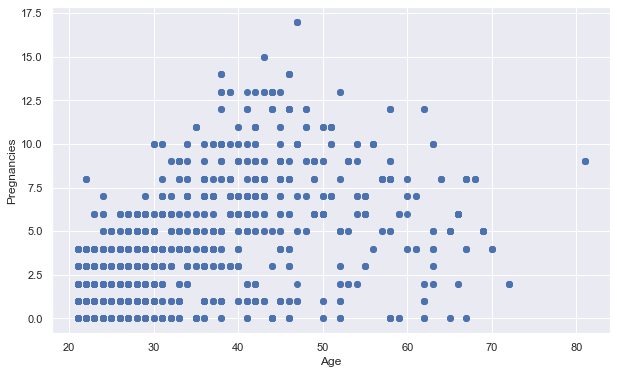

In [19]:
#for two numerical attributes
plt.figure(figsize=(10,6))
plt.scatter(trdata.Age, trdata.Pregnancies)
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.show()

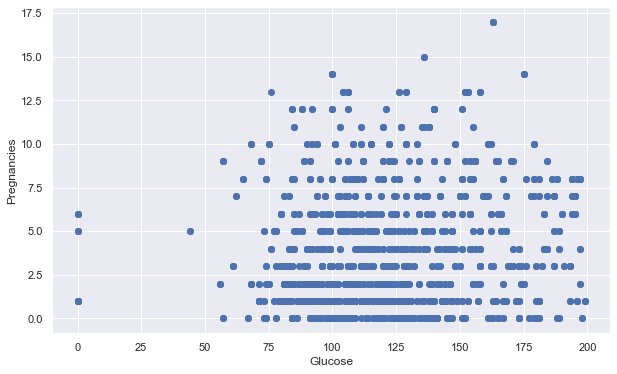

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(trdata.Glucose, trdata.Pregnancies)
plt.xlabel('Glucose')
plt.ylabel('Pregnancies')
plt.show()

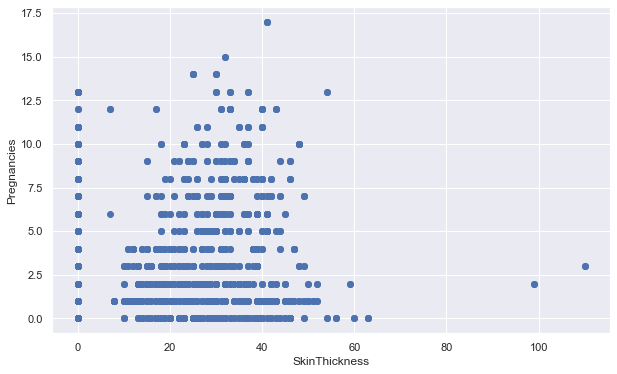

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(trdata.SkinThickness, trdata.Pregnancies)
plt.xlabel('SkinThickness')
plt.ylabel('Pregnancies')
plt.show()

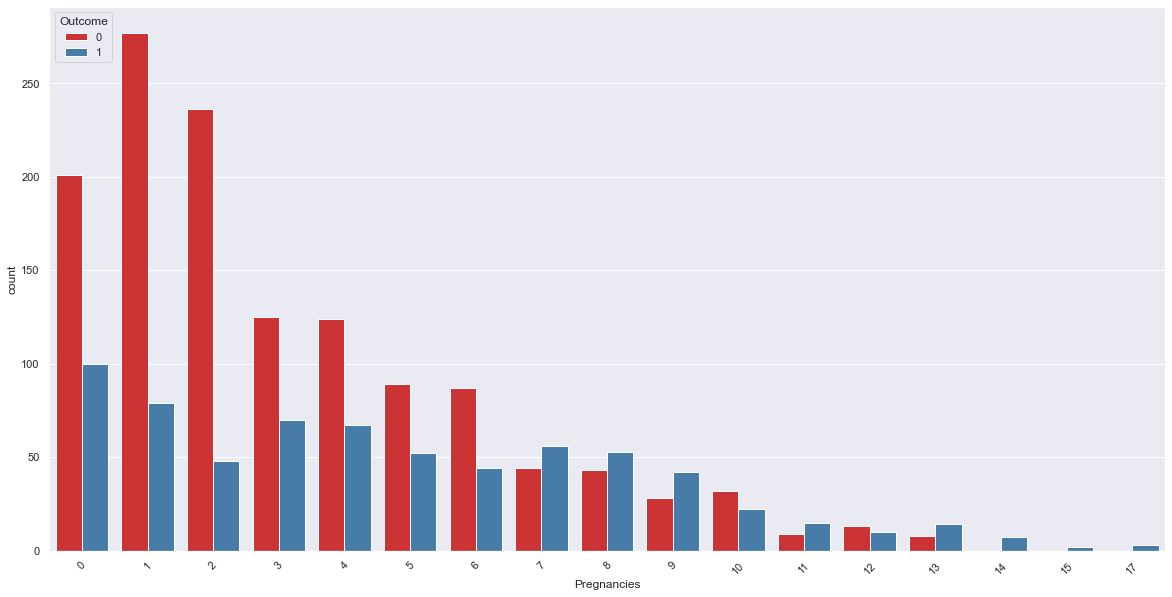

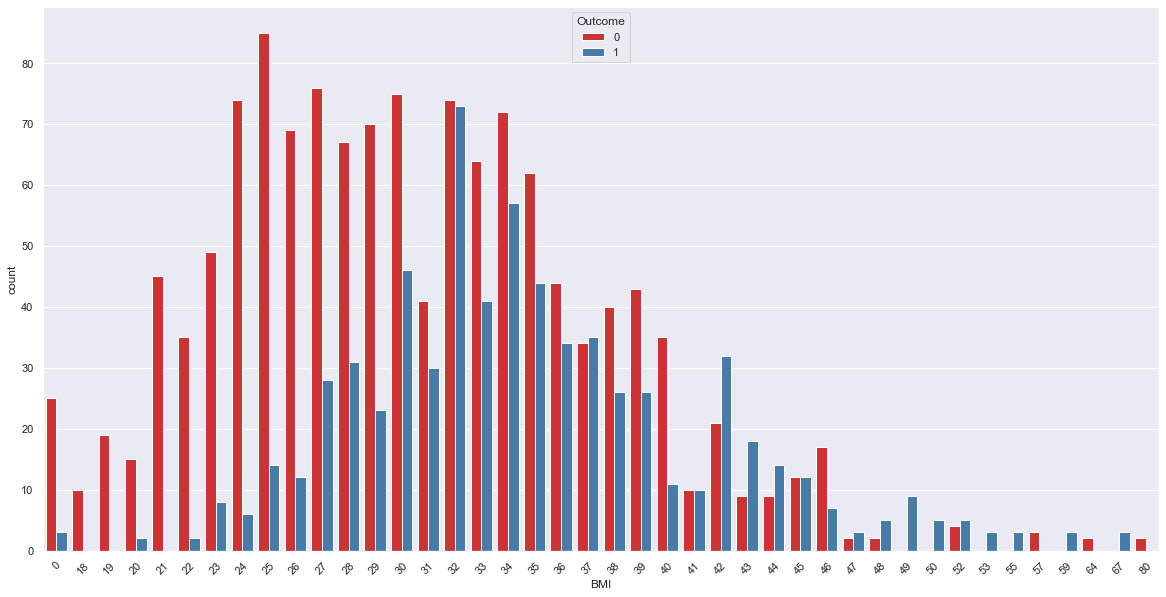

In [22]:
import seaborn as sns
for i in ['Pregnancies','BMI']:
    plt.figure(figsize=(20,10))
    chart = sns.countplot(
    data=trdata,
    x=i,
    hue='Outcome',
    palette='Set1'
    )
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    plt.show()

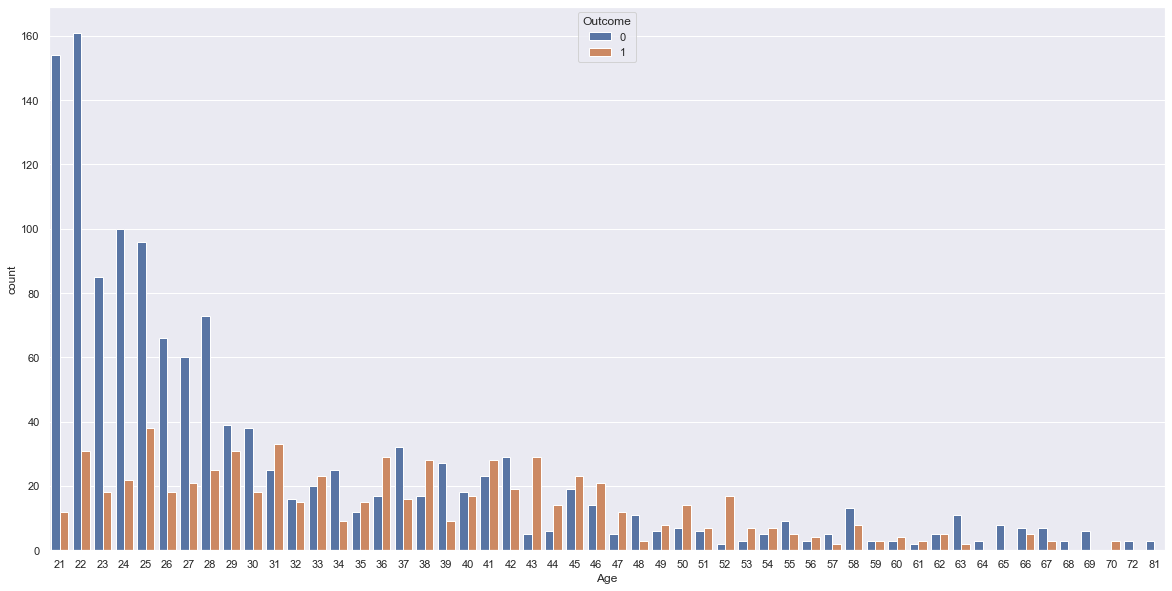

In [23]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x="Age", data=trdata,hue="Outcome")

In [ ]:
df['x'] = df['glouse'] / df['bloodpresuure']

df.to_csv('path',index=False)

# Target dattribute # balanced data

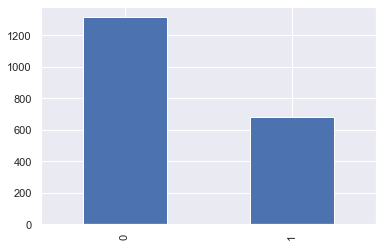

In [24]:
trdata['Outcome'].value_counts().plot(kind='bar')

# SPLITING THE DATA

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, recall_score,confusion_matrix, precision_score,f1_score
from sklearn.pipeline import Pipeline

In [54]:
from sklearn.model_selection import train_test_split

y = trdata['Outcome']
X = trdata.loc[:, trdata.columns != 'Outcome']

X_train, X_test, y_train, y_test =   train_test_split(X, y, test_size=0.20, random_state=111,stratify = y)

print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape )

(1600, 8) (400, 8)
(1600,) (400,)


In [55]:
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# scaling

In [70]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

scaler= StandardScaler()

X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

In [71]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1405,-1.117605,1.367864,1.091620,0.758170,5.416293,2.469383,-0.269179,-0.849865
1918,-0.815448,-1.560047,-1.122726,-0.187179,-0.042301,-1.424799,-0.269179,-0.936514
1163,1.903970,-0.189536,-3.653408,-1.321598,-0.729144,-3.858663,-0.269179,-0.243322
1370,0.997498,1.803936,1.355233,0.632123,-0.729144,0.278906,-0.269179,2.356152
848,0.091025,1.087532,0.300782,-1.321598,-0.729144,1.982610,-0.269179,-0.070023
...,...,...,...,...,...,...,...,...
1562,-0.513290,0.651460,1.302510,2.396775,0.870477,0.765678,-0.269179,2.616099
1256,0.695340,-0.874791,-1.017281,0.569100,-0.150750,-0.451254,-0.269179,-0.849865
39,0.091025,-0.314128,0.142614,1.640496,1.141600,0.643985,3.350036,2.009555
725,0.091025,-0.282980,0.458950,1.199333,-0.729144,0.887372,-0.269179,0.449871


In [91]:
import os

from sklearn.metrics import classification_report


def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred))

# MODELS

In [72]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

#!pip install imblearn
#from imblearn.over_sampling import SMOTE


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.metrics import make_scorer


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb

#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#from lightgbm import LGBMClassifier


import warnings
warnings.filterwarnings("ignore")

log, knn,DT,RF,SVM,Xgboost

In [77]:
models = [{'name': 'logreg','label': 'Logistic Regression',
           'classifier': LogisticRegression(random_state=88),
           },
          
          {'name': 'knn','label':'K Nearest Neighbors',
           'classifier':KNeighborsClassifier(),
           },
          
          {'name': 'dsc','label': 'Descision Tree', 
           'classifier': DecisionTreeClassifier(random_state=88),
           },
          
          {'name': 'rf', 'label': 'Random Forest',
           'classifier': RandomForestClassifier(random_state=88),
           },
          {'name': 'svc', 'label': 'SVM',
           'classifier': SVC(class_weight='balanced',random_state=88),
           },
#           {'name': 'Boosting', 'label': 'Xgboost',
#            'classifier': xgb.XGBClassifier(class_weight='balanced',objective='multi:softmax',random_state = 88),
#            }
          ]

In [78]:
def model_selection(classifier, name, X_train, y_train,X_test,y_test):
    
    classifier.fit(X_train, y_train)
    pred_train = classifier.predict(X_train)
    pred_test = classifier.predict(X_test)
    
    results_dict = {}
    
    results_dict['classifier_name'] = name    
    results_dict['Train_Accuracy'] = accuracy_score(y_train,pred_train)
    results_dict['Valid_Accuracy'] = accuracy_score(y_test,pred_test)


    
    return(results_dict)

In [79]:
results_base = []
for m in models:    
    print(m['name'])    
    results_base.append(model_selection(m['classifier'], 
                                   m['name'],
                                   X_train, 
                                   y_train,X_test,y_test
                                  ))
    print('completed')

logreg
completed
knn
completed
dsc
completed
rf
completed
svc
completed


In [80]:
results_base

[{'classifier_name': 'logreg',
  'Train_Accuracy': 0.7775,
  'Valid_Accuracy': 0.7725},
 {'classifier_name': 'knn',
  'Train_Accuracy': 0.899375,
  'Valid_Accuracy': 0.8375},
 {'classifier_name': 'dsc', 'Train_Accuracy': 1.0, 'Valid_Accuracy': 0.9625},
 {'classifier_name': 'rf', 'Train_Accuracy': 1.0, 'Valid_Accuracy': 0.955},
 {'classifier_name': 'svc',
  'Train_Accuracy': 0.823125,
  'Valid_Accuracy': 0.795}]

In [81]:
results_base_models = pd.DataFrame(results_base).sort_values(by='Valid_Accuracy', ascending = False)
results_base_models

,classifier_name,Train_Accuracy,Valid_Accuracy
2,dsc,1.000000,0.9625
3,rf,1.000000,0.9550
1,knn,0.899375,0.8375
4,svc,0.823125,0.7950
0,logreg,0.777500,0.7725


# XGB

In [86]:
from collections import Counter       #for class imbalance
counter = Counter(y)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 1.924


In [88]:
# GRID SEARCH
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
model=XGBClassifier()
weights = [1,1.9,2, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.986762 using {'scale_pos_weight': 75}
0.984243 (0.013524) with: {'scale_pos_weight': 1}
0.984621 (0.012000) with: {'scale_pos_weight': 1.9}
0.984998 (0.013200) with: {'scale_pos_weight': 2}
0.986452 (0.014988) with: {'scale_pos_weight': 10}
0.986261 (0.014278) with: {'scale_pos_weight': 25}
0.986543 (0.013875) with: {'scale_pos_weight': 50}
0.986762 (0.013283) with: {'scale_pos_weight': 75}
0.986102 (0.013409) with: {'scale_pos_weight': 99}
0.986425 (0.013476) with: {'scale_pos_weight': 100}
0.986540 (0.012680) with: {'scale_pos_weight': 1000}


In [89]:
xgb_weight = XGBClassifier()
param_grid = {  'scale_pos_weight':[75],
                'max_depth':[8,14,18],
                'n_estimators':[100,150,200,250],
              'learning_rate':[0.01,0.1,1,10],
              'subsample':[0.8]
                
                 
}
# Create grid search object
CV_xgb = GridSearchCV(estimator=xgb_weight, param_grid=param_grid, cv= 5)
CV_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [90]:
CV_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=75, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
xgb_weight_predict_train=CV_xgb.best_estimator_.predict(X_train)
xgb_weight_predict_test=CV_xgb.best_estimator_.predict(X_test)
classifcation_report_train_test(y_train, xgb_weight_predict_train, y_test, xgb_weight_predict_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1053
           1       1.00      1.00      1.00       547

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       263
           1       0.91      0.95      0.93       137

    accuracy                           0.95       400
   macro avg       0.94      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



roc_auc_score for xgb:  0.9781021897810219


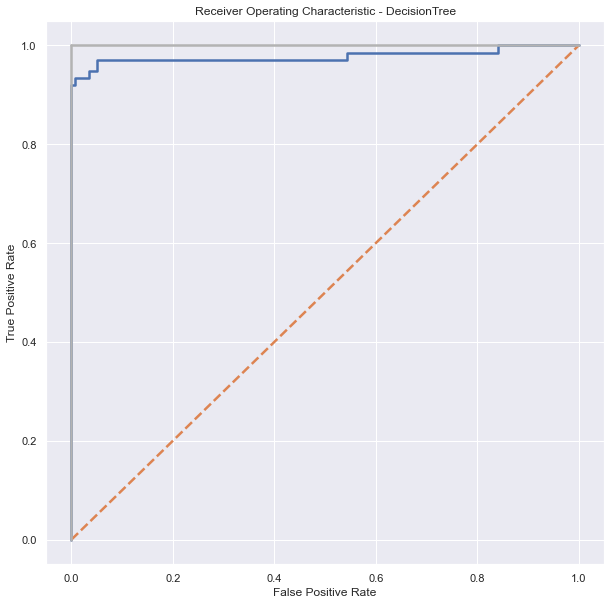

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score1 = CV_xgb.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for xgb: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [106]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
parms = {  'scale_pos_weight':[1.9],
                'max_depth':[14,15,18,20,25],
                'n_estimators':[20,50,100,150],
              'learning_rate':[0.01,0.1,1,10],
              'subsample':[0.8,0.7]
                
                 
}
clf = lgb.LGBMClassifier()

CV_lgbm = GridSearchCV(estimator = clf,param_grid = parms,cv=3,refit=True,
                        return_train_score = True,verbose=10,n_jobs=-1)
CV_lgbm.fit(X_train,y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0800s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 242 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 314 tas

GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_depth': [14, 15, 18, 20, 25],
                         'n_estimators': [20, 50, 100, 150],
                         'scale_pos_weight': [1.9], 'subsample': [0.8, 0.7]},
             return_train_score=True, verbose=10)

In [107]:
CV_lgbm.best_estimator_

LGBMClassifier(max_depth=18, n_estimators=150, scale_pos_weight=1.9,
               subsample=0.8)

In [108]:
CV_lgbm.best_params_

{'learning_rate': 0.1,
 'max_depth': 18,
 'n_estimators': 150,
 'scale_pos_weight': 1.9,
 'subsample': 0.8}

In [109]:
lgbm_weight_predict_train=CV_lgbm.best_estimator_.predict(X_train)
lgbm_weight_predict_test=CV_lgbm.best_estimator_.predict(X_test)
classifcation_report_train_test(y_train, lgbm_weight_predict_train, y_test, lgbm_weight_predict_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1053
           1       1.00      1.00      1.00       547

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       263
           1       0.97      0.93      0.95       137

    accuracy                           0.97       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.97      0.97       400



roc_auc_score for lgbm:  0.9800449612833394


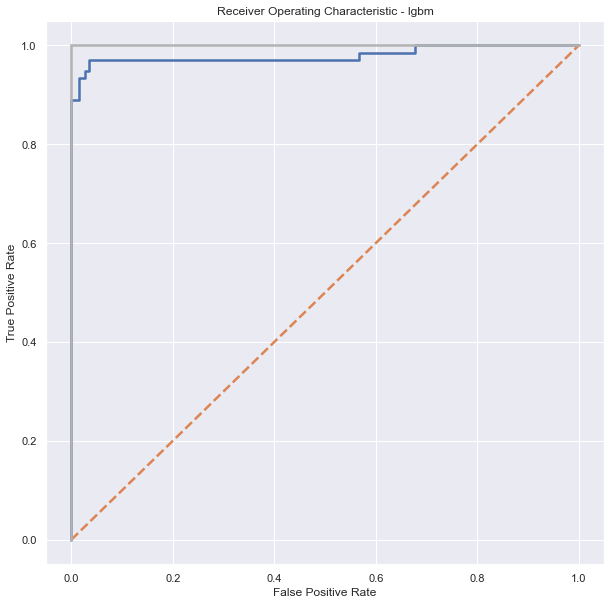

In [110]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score1 = CV_lgbm.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for lgbm: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - lgbm')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [111]:
# Creating a pickle file for the classifier
import pickle
filename = 'diabetes-prediction-lgbm-model.pkl'
pickle.dump(CV_lgbm, open(filename, 'wb'))